# Importing Libraries and Dataframe

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Updating the path to include more of the folder path to make our later code cleaner
path = r"C:\Users\jphar\Instacart Basket Analysis 09-2025"

In [3]:
ords_prods_cust_merge = pd.read_pickle(os.path.join(path, "02 Data", "Prepared Data", "ords_prods_cust_merge.pkl"))

In [4]:
ords_prods_cust_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'hour_ordered_of_day', 'days_since_prior_order', 'first_time_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices', 'price_category',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_order_price', 'spender_type', 'median_days_prior',
       'order_frequency', 'gender', 'state', 'age', 'date_joined',
       'num_of_dependents', 'martial_status', 'income'],
      dtype='object')

In [ ]:
ords_prods_cust_merge = ords_prods_cust_merge.drop(['add_to_cart_order', 'reordered', 'busiest_days', 'median_days_prior''], axis = 1

## Data Consistency Check on First Time Customers

In [5]:
crosstab = pd.crosstab(ords_prods_cust_merge['days_since_prior_order'], ords_prods_cust_merge['order_number'], dropna = False)

In [6]:
crosstab.to_clipboard()

In [7]:
ords_prods_cust_merge['first_time_order'].value_counts()

first_time_order
No     30328763
Yes     2076096
Name: count, dtype: int64

# Project Responses and Calculations

## 2 - Addressing PII Concerns

This was addressed in an earlier notebook but the fields for customer first and last names have been removed since these fields would be classify as PII.
This is also detailed in the Excel report to stakeholders.

## 3 - The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. 

Regional Mapping Source: https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

In [8]:
ords_prods_cust_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'hour_ordered_of_day', 'days_since_prior_order', 'first_time_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices', 'price_category',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_order_price', 'spender_type', 'median_days_prior',
       'order_frequency', 'gender', 'state', 'age', 'date_joined',
       'num_of_dependents', 'martial_status', 'income'],
      dtype='object')

In [9]:
# For this request, there are quite a few regions to condition for so we'll need to first figure out how the values in the state field are reflected.
# This is also handy for double checking results later to ensure it is consistent

ords_prods_cust_merge['state'].value_counts()

state
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

In [10]:
# Now that we have an idea of how the values are reflected (as the full name of the state) we can begin figuring out our conditions
# I will set this up with a subset first to ensure it is successful before applying it to the main dataframe

df_test = ords_prods_cust_merge[:2000000]

In [11]:
df_test.shape

(2000000, 32)

For Clarity, there are 4 regions and will be reflected as a number for the region field

- Region 1: Northeast (1)
- Region 2: Midwest (2)
- Region 3: South (3)
- Region 4: West (4)

In [12]:
# We'll start setting up our conditions - Note we want to set up the regional flags so we will not prioritize the sub-division in this case
# We'll set up a for loop that will evaluate the values in the state field and add a string to our empty list based on our conditions
# I will also assign the states corresponding to region in a list to make the code in the for loop for readability. 
# I will use the 3 smallest regions to evaluate in the for-loop and the remaining values will be placed in the else clause

result = []

region_1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
region_2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska',
            'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region_4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska',
            'Washington', 'Oregon', 'California', 'Hawaii']

for value in df_test['state']:
    if value in region_1:
        result.append('1')
    elif value in region_2:
        result.append('2')
    elif value in region_4:
        result.append('4')
    else:
        result.append('3')


In [13]:
df_test['region'] = result

C:\Users\jphar\AppData\Local\Temp\ipykernel_15064\3289588891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['region'] = result


In [14]:
# As we can see from the output below, it seems to have separated successfully based on our condition

df_test['region'].value_counts()

region
3    656596
4    511773
2    468827
1    362804
Name: count, dtype: int64

In [15]:
region_test = df_test['state'].value_counts()

In [16]:
# Going to use to_clipboard() to paste into Excel and evaluate if it is accurate via a pivot table
# Based on my calculations the field was created successfully so we can apply it to our main dataframe and proceed 

region_test.to_clipboard()

In [17]:
result = []

region_1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
region_2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska',
            'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region_4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska',
            'Washington', 'Oregon', 'California', 'Hawaii']

for value in ords_prods_cust_merge['state']:
    if value in region_1:
        result.append('1')
    elif value in region_2:
        result.append('2')
    elif value in region_4:
        result.append('4')
    else:
        result.append('3')

In [18]:
ords_prods_cust_merge['region'] = result

In [19]:
ords_prods_cust_merge['region'].value_counts()

region
3    10791885
4     8292913
2     7597325
1     5722736
Name: count, dtype: int64

### 3A - Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [20]:
# Taking a quick look to remember the field names

ords_prods_cust_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'hour_ordered_of_day', 'days_since_prior_order', 'first_time_order',
       'product_id', 'add_to_cart_order', 'reordered', '_merge',
       'product_name', 'aisle_id', 'department_id', 'prices', 'price_category',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_order_price', 'spender_type', 'median_days_prior',
       'order_frequency', 'gender', 'state', 'age', 'date_joined',
       'num_of_dependents', 'martial_status', 'income', 'region'],
      dtype='object')

In [32]:
# With the fields identified we can set up a crosstab to compare regions with spending types (i.e., low or high spender)

region_and_spend = pd.crosstab(ords_prods_cust_merge['region'], ords_prods_cust_merge['spender_type'], dropna = False)

In [33]:
# We'll then use Excel to view the findings. The table out will be reflected in the Excel report to stakeholders

region_and_spend.to_clipboard()

#### Analysis

Our highlight table is reflected in the Excel report. As we can see from the table, Region 3 (South) has the highest number of highest and lowest spenders compared to the other regions. These are individuals that are spending on average either more or less than $10 per order. Region 1 however, has the lowest amount of high and low spenders with their region. 

## 4 - The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [23]:
# So to create this field I will leverage our max_order field as it reflects the highest number of orders 
# that the customer has made for every record in the dataframe. We'll then compare that value to either less than 5 or greater than or equal to 5
# to define our new field

ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order'] < 5, 'activity_level'] = 'Low activity customer'
ords_prods_cust_merge.loc[ords_prods_cust_merge['max_order'] >= 5, 'activity_level'] = 'Regular activity customer'

In [24]:
# To determine if this worked successfully we'll create a subset that we can then calculate the number of records that fit the criteria 
# for 'low activity customer' and see if that matches to the overall dataframe

df_low_activity = ords_prods_cust_merge[ords_prods_cust_merge['max_order'] < 5]

In [25]:
df_low_activity['max_order'].value_counts()

max_order
4    753543
3    686741
2         6
1         5
Name: count, dtype: int64

In [26]:
# And with a quick calculation we can see that this value matches what we have for the 'low activity customer'

ords_prods_cust_merge['activity_level'].value_counts()

activity_level
Regular activity customer    30964564
Low activity customer         1440295
Name: count, dtype: int64

In [28]:
# Now we'll exclude these individuals by subsetting for regular active users

df_reg_activity = ords_prods_cust_merge[ords_prods_cust_merge['max_order'] > 5]

In [30]:
df_reg_activity['max_order'].value_counts()

max_order
99    1171333
8      811843
6      811396
9      810213
7      803979
       ...   
93      50333
90      48328
97      44949
98      44587
96      40453
Name: count, Length: 94, dtype: int64

In [31]:
# With that, we'll export this data since it is needed by a stakeholder. To have this work effectively we'll need to export as a pickle
# since the number of low activity customer exceeds the number of rows that can be maintained by Excel

df_reg_activity.to_pickle(os.path.join(path, "02 Data", "Prepared Data", "activity_data.pkl"))

## 5 - The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

Need to Create a profiling variable based on age, income, certain goods in the department_id field, and number of dependents

- Number of Dependents > 0 ? (They could be expecting?)
- Age Range - 18 to 24 ?
- Income - ?
- Certain Goods Purchased in department_id - department_id of 18 (Babies)? 11 (Personal Care)? 17 (Household)?

Should evaluate to flag as single adult or young parent

Age range is 63, min 18 and max 81
If we consider young parents being from 18 to 24... that could make it easier to define

In [37]:
ords_prods_cust_merge['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

# Project Brief Key Questions

## 3 - Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

We created a pricing category field earlier and so now we'll visualize this field to get a better sense of the kinds of products Instacart offers as a bar chart.

<Axes: xlabel='price_category'>

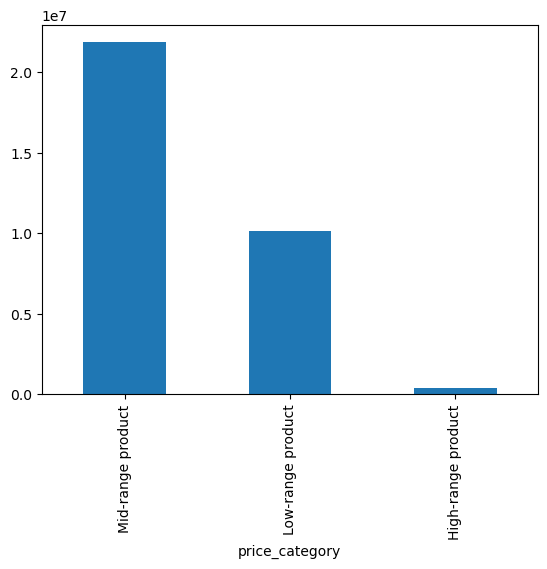

In [6]:
ords_prods_cust_merge['price_category'].value_counts().plot.bar()

In [7]:
ords_prods_cust_merge['price_category'].value_counts()

price_category
Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: count, dtype: int64

In [11]:
table = ords_prods_cust_merge['prices'].value_counts(bins = 25, sort = False)

In [13]:
table.to_clipboard()